In [1]:
# Import necessary libraries
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.preprocessing import LabelEncoder, StandardScaler

from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn import model_selection
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import RandomizedSearchCV

In [2]:
# function to classify and display the results 
def runClassifer(classifier, X_train, y_train, y_test):
        classifier.fit(X_train, y_train)
        y_pred = classifier.predict(X_test)
        print("Accuracy:",accuracy_score(y_test, y_pred))
        print("Confusion matrix: \n", confusion_matrix(y_test, y_pred))
        print(classification_report(y_test, y_pred))        

In [3]:
# Set the preferences
pd.set_option('display.max_columns',100) 
pd.set_option('display.max_colwidth', 100)

In [4]:
# Read the data from the file
Data = pd.read_csv('kidneyChronic.csv')
Data.head(10)

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,bu,sc,sod,pot,hemo,pcv,wbcc,rbcc,htn,dm,cad,appet,pe,ane,class
0,48,80,1.02,1,0,?,normal,notpresent,notpresent,121,36,1.2,?,?,15.4,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,7,50,1.02,4,0,?,normal,notpresent,notpresent,?,18,0.8,?,?,11.3,38,6000,?,no,no,no,good,no,no,ckd
2,62,80,1.01,2,3,normal,normal,notpresent,notpresent,423,53,1.8,?,?,9.6,31,7500,?,no,yes,no,poor,no,yes,ckd
3,48,70,1.005,4,0,normal,abnormal,present,notpresent,117,56,3.8,111,2.5,11.2,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,51,80,1.01,2,0,normal,normal,notpresent,notpresent,106,26,1.4,?,?,11.6,35,7300,4.6,no,no,no,good,no,no,ckd
5,60,90,1.015,3,0,?,?,notpresent,notpresent,74,25,1.1,142,3.2,12.2,39,7800,4.4,yes,yes,no,good,yes,no,ckd
6,68,70,1.01,0,0,?,normal,notpresent,notpresent,100,54,24,104,4,12.4,36,?,?,no,no,no,good,no,no,ckd
7,24,?,1.015,2,4,normal,abnormal,notpresent,notpresent,410,31,1.1,?,?,12.4,44,6900,5,no,yes,no,good,yes,no,ckd
8,52,100,1.015,3,0,normal,abnormal,present,notpresent,138,60,1.9,?,?,10.8,33,9600,4,yes,yes,no,good,no,yes,ckd
9,53,90,1.02,2,0,abnormal,abnormal,present,notpresent,70,107,7.2,114,3.7,9.5,29,12100,3.7,yes,yes,no,poor,no,yes,ckd


In [5]:
# We can see that there are some missing values and 
Data.describe()

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,bu,sc,sod,pot,hemo,pcv,wbcc,rbcc,htn,dm,cad,appet,pe,ane,class
count,400,400,400,400,400,400,400,400,400,400,400,400,400,400,400,400,400,400,400,400,400,400,400,400,400
unique,77,11,6,7,7,3,3,3,3,147,119,85,35,41,116,45,93,47,3,6,4,3,3,3,2
top,60,80,1.02,0,0,normal,normal,notpresent,notpresent,?,?,1.2,?,?,?,?,?,?,no,no,no,good,no,no,ckd
freq,19,116,106,199,290,201,259,354,374,44,19,40,87,88,52,70,105,130,251,258,362,317,323,339,250


In [6]:
# Data Pre Processing
# Steps followed
# 1. Replace all ? with np.nan
# 2. Use SimpleImputer to update missing values with mean for numeric attributes
#    and most frequent value for nominal variables
# 3. Encode the labels for the nominal attribute values
# 4. Pick one of the attributes among the highly correlated attributes
# 5. Use StandardScaler to scale and transform the data  

In [7]:
# Replace missing values with NaN
Data.replace(['?', '?\t', '\t?'], np.nan, inplace=True)

# Columns for the numeric and nominal attributes
numerical_columns = ['age', 'bp',  'bgr', 'bu', 'sc', 'sod', 'pot', 'hemo', 'pcv', 'wbcc', 'rbcc'] # 11 columns
nominal_columns = ['sg','al', 'su', 'rbc', 'pc', 'pcc', 'ba', 'htn', 'dm', 'cad','appet', 'pe', 'ane', 'class']  # 14 columns

# Fill the missing values with mean and most frequent value for the numeric and nominal
# attributes
imp_nominal = SimpleImputer(strategy="most_frequent")
imp_numeric = SimpleImputer(missing_values=np.nan, strategy='mean')
Data[nominal_columns] = imp_nominal.fit_transform(Data[nominal_columns])
Data[numerical_columns] = imp_numeric.fit_transform(Data[numerical_columns])

In [8]:
# Encode the labels for the nominal attributes
labelencoder = LabelEncoder()
Data[nominal_columns] = Data[nominal_columns].apply(labelencoder.fit_transform)
Data = Data.astype(float)

Heatmap for correlation of the attributes:


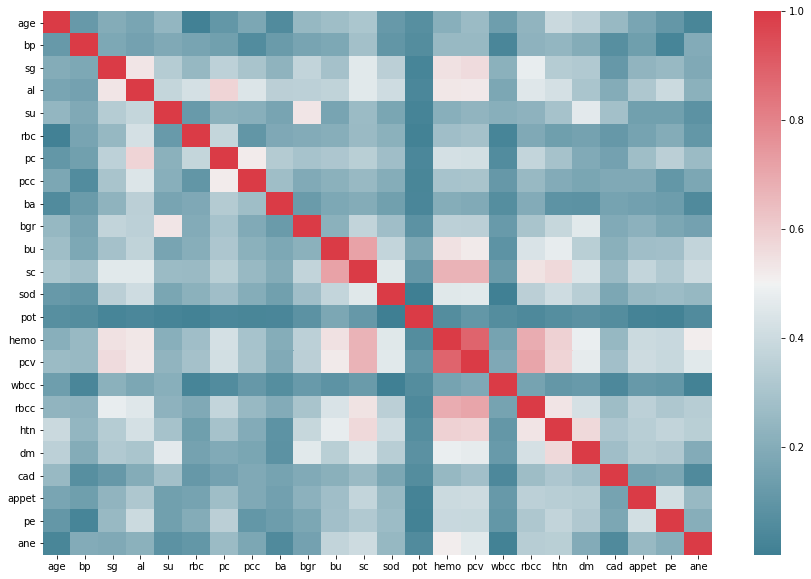

In [9]:
# Check if any of the attributes are corelated using the the heatmap
corr = Data.iloc[:, 0:-1].astype(float).corr(method='spearman').abs()
print("Heatmap for correlation of the attributes:")
ax = plt.subplots(figsize=(15,10)) 
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, cmap=sns.diverging_palette(220, 10, as_cmap=True))
plt.show()

In [10]:
# Select upper triangle of correlation matrix
upper = corr.where(np.triu(np.ones(corr.shape), k=1).astype(bool))
# Find index of feature columns with correlation greater than 0.9
to_drop = [column for column in upper.columns if any(upper[column] > 0.9)]
Data = Data.drop(columns=to_drop)

In [11]:
# Divide X and y based on the features and class column/attribute
X = Data.iloc[:, 0:-1]
y = Data.iloc[:, -1]

# Split the training and test data set
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=2)

In [12]:
# Scale the values using StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

Histogram plots for the attributes:


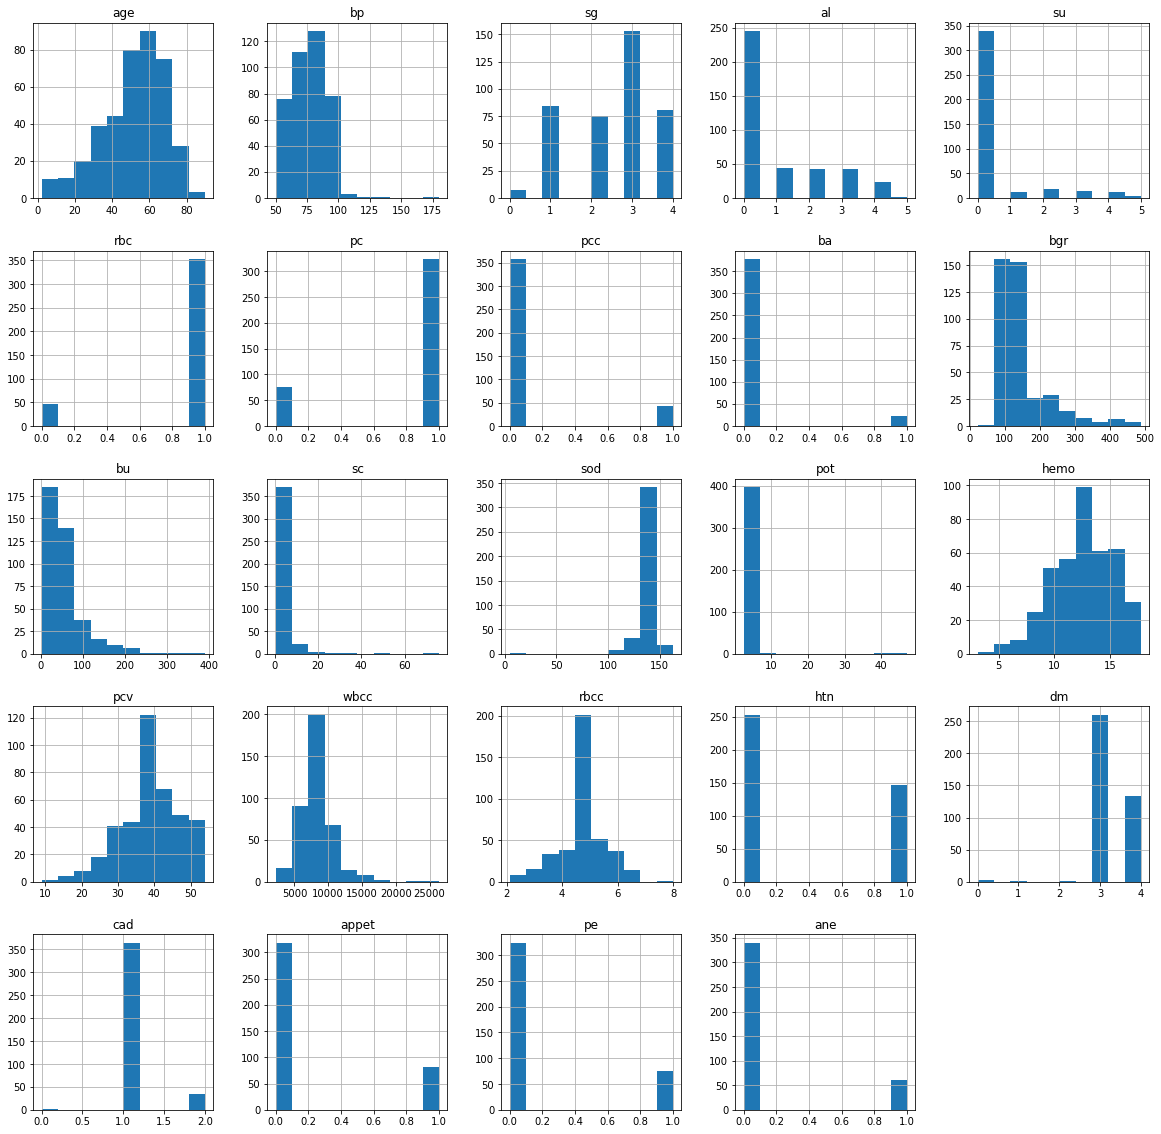

In [13]:
# Plot the histogram for the attribute values
print("Histogram plots for the attributes:")
hist = X.hist(figsize=[20,20])
plt.show()

In [14]:
print("Statistics and box plot for the Numerical attributes:")
Data[numerical_columns] = scaler.fit_transform(Data[numerical_columns])
Data.describe()

Statistics and box plot for the Numerical attributes:


,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,bu,sc,sod,pot,hemo,pcv,wbcc,rbcc,htn,dm,cad,appet,pe,ane,class
count,4.000000e+02,4.000000e+02,400.000000,400.00000,400.000000,400.000000,400.000000,400.000000,400.000000,4.000000e+02,4.000000e+02,4.000000e+02,4.000000e+02,4.000000e+02,4.000000e+02,4.000000e+02,4.000000e+02,4.000000e+02,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,4.159173e-16,-5.101475e-16,2.542500,0.90000,0.395000,0.882500,0.810000,0.105000,0.055000,-2.146200e-16,2.517431e-16,-2.248202e-16,-8.562595e-17,-9.880985e-17,-3.552714e-17,-4.163336e-17,1.174061e-16,5.107026e-17,0.367500,3.300000,1.080000,0.205000,0.190000,0.150000,0.375000
std,1.001252e+00,1.001252e+00,1.086806,1.31313,1.040038,0.322418,0.392792,0.306937,0.228266,1.001252e+00,1.001252e+00,1.001252e+00,1.001252e+00,1.001252e+00,1.001252e+00,1.001252e+00,1.001252e+00,1.001252e+00,0.482728,0.579517,0.289499,0.404207,0.392792,0.357519,0.484729
min,-2.918730e+00,-1.966580e+00,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,-1.687482e+00,-1.136142e+00,-4.763339e-01,-1.447103e+01,-7.553446e-01,-3.474833e+00,-3.670915e+00,-2.462684e+00,-3.106814e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,-5.593680e-01,-4.806345e-01,2.000000,0.00000,0.000000,1.000000,1.000000,0.000000,0.000000,-6.297642e-01,-6.181044e-01,-3.872147e-01,-2.750810e-01,-2.227225e-01,-6.087632e-01,-5.999959e-01,-5.678913e-01,-2.471631e-01,0.000000,3.000000,1.000000,0.000000,0.000000,0.000000,0.000000
50%,1.484407e-01,1.311692e-01,3.000000,0.00000,0.000000,1.000000,1.000000,0.000000,0.000000,-2.950433e-01,-2.727461e-01,-2.980955e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,-1.058283e-15,0.000000,3.000000,1.000000,0.000000,0.000000,0.000000,0.000000
75%,7.382812e-01,2.623384e-01,3.000000,2.00000,0.000000,1.000000,1.000000,0.000000,0.000000,2.628875e-02,8.784855e-02,0.000000e+00,3.776065e-01,6.134259e-02,7.735858e-01,6.283716e-01,3.943858e-01,4.677496e-01,1.000000,4.000000,1.000000,0.000000,0.000000,0.000000,1.000000
max,2.271867e+00,7.692067e+00,4.000000,5.00000,5.000000,1.000000,1.000000,1.000000,1.000000,4.578493e+00,6.776626e+00,1.299849e+01,2.770794e+00,1.504578e+01,1.943975e+00,1.856739e+00,7.140246e+00,3.923161e+00,1.000000,4.000000,2.000000,1.000000,1.000000,1.000000,1.000000


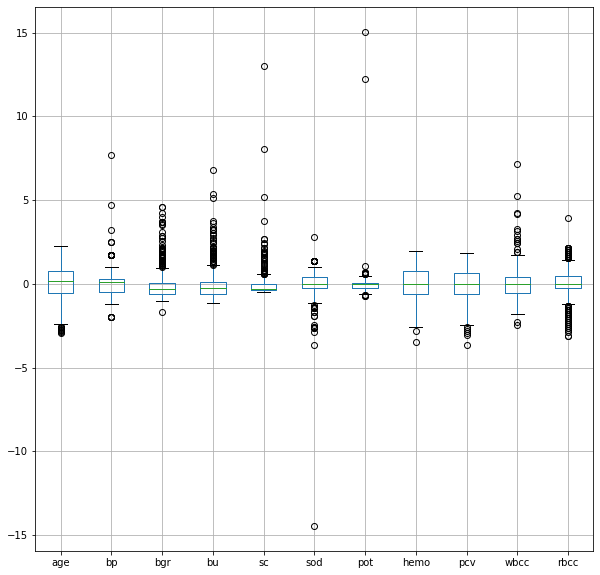

In [15]:
boxplot = Data[numerical_columns].astype(float).boxplot(figsize=[10,10])
plt.show()

In [16]:
# Create Decision Tree classifier object
dtc = DecisionTreeClassifier(random_state=2)
print("Classifier used - Decision Tree Classifier :")
runClassifer(dtc,X_train,y_train,y_test)

Classifier used - Decision Tree Classifier :
Accuracy: 0.9666666666666667
Confusion matrix: 
 [[75  3]
 [ 1 41]]
              precision    recall  f1-score   support

         0.0       0.99      0.96      0.97        78
         1.0       0.93      0.98      0.95        42

    accuracy                           0.97       120
   macro avg       0.96      0.97      0.96       120
weighted avg       0.97      0.97      0.97       120



In [17]:
# Create Gaussian Naive Bayes classifier object
gnb = GaussianNB()
print("Classifier used - Gaussian Naive Bayes :")
runClassifer(gnb,X_train,y_train,y_test)

Classifier used - Gaussian Naive Bayes :
Accuracy: 0.9666666666666667
Confusion matrix: 
 [[74  4]
 [ 0 42]]
              precision    recall  f1-score   support

         0.0       1.00      0.95      0.97        78
         1.0       0.91      1.00      0.95        42

    accuracy                           0.97       120
   macro avg       0.96      0.97      0.96       120
weighted avg       0.97      0.97      0.97       120



In [18]:
# Create Gradient Boosting classifier object
gbc = GradientBoostingClassifier(random_state=2)
print("Classifier used - Gradient Boosting :")
runClassifer(gbc,X_train,y_train,y_test)

Classifier used - Gradient Boosting :
Accuracy: 0.9916666666666667
Confusion matrix: 
 [[77  1]
 [ 0 42]]
              precision    recall  f1-score   support

         0.0       1.00      0.99      0.99        78
         1.0       0.98      1.00      0.99        42

    accuracy                           0.99       120
   macro avg       0.99      0.99      0.99       120
weighted avg       0.99      0.99      0.99       120



In [19]:
# Create SVM classifier object
svm = SVC(kernel='rbf',random_state=2)
print("Classifier used - SVM :")
runClassifer(svm,X_train,y_train,y_test)

Classifier used - SVM :
Accuracy: 1.0
Confusion matrix: 
 [[78  0]
 [ 0 42]]
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        78
         1.0       1.00      1.00      1.00        42

    accuracy                           1.00       120
   macro avg       1.00      1.00      1.00       120
weighted avg       1.00      1.00      1.00       120



In [20]:
# Create Random Forest classifier object

In [21]:
# implementing train-test-split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=66)

In [22]:
# random forest model creation

rfc = RandomForestClassifier()
rfc.fit(X_train,y_train)
# predictions
rfc_predict = rfc.predict(X_test)
rfc_cv_score = cross_val_score(rfc, X, y, cv=10, scoring='roc_auc')

In [23]:
print("=== Confusion Matrix ===")
print(confusion_matrix(y_test, rfc_predict))
print('\n')
print("=== Classification Report ===")
print(classification_report(y_test, rfc_predict))
print('\n')
print("=== All AUC Scores ===")
print(rfc_cv_score)
print('\n')
print("=== Mean AUC Score ===")
print("Mean AUC Score - Random Forest: ", rfc_cv_score.mean())

=== Confusion Matrix ===
[[79  0]
 [ 2 51]]


=== Classification Report ===
              precision    recall  f1-score   support

         0.0       0.98      1.00      0.99        79
         1.0       1.00      0.96      0.98        53

    accuracy                           0.98       132
   macro avg       0.99      0.98      0.98       132
weighted avg       0.99      0.98      0.98       132



=== All AUC Scores ===
[1.    1.    1.    1.    0.984 1.    1.    1.    1.    1.   ]


=== Mean AUC Score ===
Mean AUC Score - Random Forest:  0.9984


In [24]:
# We’ll use RandomizedSearchCV from sklearn to optimize our hyperparamaters

# number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]

# number of features at every split
max_features = ['auto', 'sqrt']

# max depth
max_depth = [int(x) for x in np.linspace(100, 500, num = 11)]
max_depth.append(None)

# create random grid
random_grid = {
 'n_estimators': n_estimators,
 'max_features': max_features,
 'max_depth': max_depth
 }

# Random search of parameters
rfc_random = RandomizedSearchCV(estimator = rfc, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)

# Fit the model
rfc_random.fit(X_train, y_train)

# print results
print(rfc_random.best_params_)

Fitting 3 folds for each of 100 candidates, totalling 300 fits
{'n_estimators': 1400, 'max_features': 'auto', 'max_depth': 100}


In [27]:
# The results were '{'n_estimators': 1400, 'max_features': 'auto', 'max_depth': 100}'

# Now we can plug these back into the model to see if it improved our performance

In [25]:
rfc = RandomForestClassifier(n_estimators=600, max_depth=300, max_features='sqrt')
rfc.fit(X_train,y_train)
rfc_predict = rfc.predict(X_test)
rfc_cv_score = cross_val_score(rfc, X, y, cv=10, scoring='roc_auc')
print("=== Confusion Matrix ===")
print(confusion_matrix(y_test, rfc_predict))
print('\n')
print("=== Classification Report ===")
print(classification_report(y_test, rfc_predict))
print('\n')
print("=== All AUC Scores ===")
print(rfc_cv_score)
print('\n')
print("=== Mean AUC Score ===")
print("Mean AUC Score - Random Forest: ", rfc_cv_score.mean())

=== Confusion Matrix ===
[[79  0]
 [ 2 51]]


=== Classification Report ===
              precision    recall  f1-score   support

         0.0       0.98      1.00      0.99        79
         1.0       1.00      0.96      0.98        53

    accuracy                           0.98       132
   macro avg       0.99      0.98      0.98       132
weighted avg       0.99      0.98      0.98       132



=== All AUC Scores ===
[1.         1.         1.         1.         0.99466667 1.
 1.         1.         1.         1.        ]


=== Mean AUC Score ===
Mean AUC Score - Random Forest:  0.9994666666666667


In [26]:
# As we can see there was a slight performace improvement in the Mean AUC Score